# Sentiment Based Product Recommendation System

## **Solved by: Riddhi Tokdar**

## Problem Statement:

An e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

1.Data sourcing and sentiment analysis

2.Building a recommendation system

3.Improving the recommendations using the sentiment analysis model

4.Deploying the end-to-end project with a user interface



# Solution/Code :

#### Importing Necessary Libraries

In [1]:
#basic libraries for data i/o,visualisation, calculations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set_style('darkgrid')

In [4]:
#libraries for nlp
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

from wordcloud import WordCloud, STOPWORDS
#stop_words=set(STOPWORDS)

#!pip install swifter
import swifter
import re
import spacy
nlp = spacy.load('en_core_web_sm')

In [5]:
# import libraries for model building and model evalution:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,f1_score
from sklearn.metrics import auc, plot_roc_curve

#import libraries to handle class imbalance

from collections import Counter
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


# Data Understanding and Cleaning

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path='/content/drive/MyDrive/SBPRS_Cap_Data/'

In [8]:
#read the data
df= pd.read_csv(path+'sample30.csv')
#df=pd.read_csv('sample30.csv')
df_copy=df.copy()

In [9]:
#check head of data
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [10]:
#check data shape
df.shape

(30000, 15)

In [11]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [12]:
#Null precentage
print("Percentage of missing values :")
null_info = df.isna().sum() / len(df) * 100
null_info.sort_values(ascending = False).head(50).round(4)

Percentage of missing values :


reviews_userProvince    99.4333
reviews_userCity        93.5700
reviews_didPurchase     46.8933
reviews_doRecommend      8.5667
reviews_title            0.6333
manufacturer             0.4700
reviews_username         0.2100
reviews_date             0.1533
user_sentiment           0.0033
id                       0.0000
brand                    0.0000
categories               0.0000
name                     0.0000
reviews_rating           0.0000
reviews_text             0.0000
dtype: float64

**Observaton:** 

The columns reviews_userProvince and reviews_userCity has more than 90% data missing. So we can drop those columns.

In [13]:
#drop columns
df.drop(columns=['reviews_userCity','reviews_userProvince'],inplace=True)

In [14]:
#check after dropping
df.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
16194,AVpf63aJLJeJML43F__Q,Burt's Bees,"Personal Care,Makeup,Lipstick, Lip Gloss, & Li...",Burt's Bees,"Burt's Bees Lip Shimmer, Raisin",2013-12-27T00:00:00.000Z,False,True,5,Have been using Burt's Bees products for years...,Love Lip Shimmer,slem,Positive
2012,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2016-12-10T00:00:00.000Z,NaN,True,4,If you like slapstick humor you will love this...,Hysterical,zeroonec,Positive
3522,AVpe6FpaLJeJML43yBuP,Warner Bros.,"Movies, Music & Books,Movies,New Movie Release...",Hbo Home Video,Sopranos:Season 6 Part 1 (blu-Ray),2014-08-28T00:00:00.000Z,NaN,True,4,I remember when these DVDs were so expensive.....,Great Price...,spunky,Positive
25897,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2014-12-26T00:00:00.000Z,NaN,True,5,Good movie definitely worth great cast great s...,Great movie,joe4523,Positive
12077,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-19T00:00:00.000Z,False,True,5,Love to use this product at home and work... g...,Clorox,jas37,Positive


In [15]:
#check reviews_didPurchase column
print(df.reviews_didPurchase.value_counts())
print("NA: ",df.reviews_didPurchase.isna().sum())

False    14498
True      1434
Name: reviews_didPurchase, dtype: int64
NA:  14068


**Observation:**

As it can be seen, the value should be either true or false. As more the 45% data are missing, we can drop this column when analysing

In [16]:
#dropping the column
df.drop(columns=['reviews_didPurchase'],inplace=True)
#check after dropping
df.sample(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
435,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-05-28T00:00:00.000Z,True,5,My eyes are very sensitive! Every moisturizer ...,Absolutely love the hydration! Never oily!,cat2015,Positive
7277,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-28T00:00:00.000Z,True,4,These are great for the bathroom. I use them f...,Works great for small spaces and small jobs,bg13,Positive
1667,AVpe31o71cnluZ0-YrSD,Warner Bros.,"Movies, Music & Books,Movies,Comedy,Movies & T...",TIME WARNER,Dark Shadows (includes Digital Copy) (ultravio...,2015-11-09T00:00:00.000Z,True,5,really funny movie - wanted to add it to my co...,Depp at his best,mirafone,Positive


In [17]:
#Null precentage
print("Percentage of missing values :")
null_info = df.isna().sum() / len(df) * 100
null_info.sort_values(ascending = False).round(4)

Percentage of missing values :


reviews_doRecommend    8.5667
reviews_title          0.6333
manufacturer           0.4700
reviews_username       0.2100
reviews_date           0.1533
user_sentiment         0.0033
id                     0.0000
brand                  0.0000
categories             0.0000
name                   0.0000
reviews_rating         0.0000
reviews_text           0.0000
dtype: float64

In [18]:
#check reviews_doRecommend column
print(df.reviews_doRecommend.value_counts())
print("NA: ",df.reviews_doRecommend.isna().sum())

True     25880
False     1550
Name: reviews_doRecommend, dtype: int64
NA:  2570


In [19]:
#replacing NA with different value for visualisation
df['reviews_doRecommend'].fillna('Not Available', inplace=True)

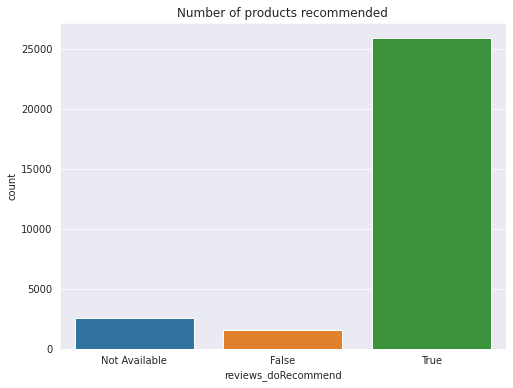

In [20]:
plt.figure(figsize=(8,6))
plt.title('Number of products recommended')
sns.countplot(df['reviews_doRecommend'])

It can be seen that most of the products were recommended. We can remove the column from analysis

In [21]:
#drop column
df.drop(columns=['reviews_doRecommend'],inplace=True)
#check after dropping
df.sample(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
21127,AVpfM_ytilAPnD_xXIJb,Tostitos,"Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...",Tostitos,Tostitos Bite Size Tortilla Chips,2017-01-18T00:00:00.000Z,5,Excellent,10,tomahnas,Positive
4736,AVpf0eb2LJeJML43EVSt,Sony Pictures,"Movies, Music & Books,Ways To Shop Entertainme...",SONY CORP,The Resident Evil Collection 5 Discs (blu-Ray),2017-05-20T00:00:00.000Z,4,I brought this as a gift for a friend's birthd...,Great movie pack,ash18,Negative
13745,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-06T00:00:00.000Z,5,Clorox products help keep my home clean and di...,Clorox Products are Great!,tiptop,Positive


In [22]:
#check for missing values
print("Percentage of missing values :")
null_info = df.isna().sum() / len(df) * 100
null_info.sort_values(ascending = False).round(4)

Percentage of missing values :


reviews_title       0.6333
manufacturer        0.4700
reviews_username    0.2100
reviews_date        0.1533
user_sentiment      0.0033
id                  0.0000
brand               0.0000
categories          0.0000
name                0.0000
reviews_rating      0.0000
reviews_text        0.0000
dtype: float64

We can see that only a small percentage of data in some columns are missing. We can drop the missing values

In [23]:
#dropping all rows with missing values
df=df.dropna()

In [24]:
#check data after dropping
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative


In [25]:
#check missing values
print("Percentage of missing values :")
null_info = df.isna().sum() / len(df) * 100
null_info.sort_values(ascending = False).round(4)

Percentage of missing values :


id                  0.0
brand               0.0
categories          0.0
manufacturer        0.0
name                0.0
reviews_date        0.0
reviews_rating      0.0
reviews_text        0.0
reviews_title       0.0
reviews_username    0.0
user_sentiment      0.0
dtype: float64

In [26]:
# Checking for duplicate rows:
df.duplicated().sum()

15

In [27]:
#drop duplicate values
df.drop_duplicates(inplace=True)

In [28]:
#check shape
df.shape

(29551, 11)

###### working with reviews_date 

In [29]:
#extract only the date part
df['reviews_date'] = df['reviews_date'].str[:10]
df['reviews_date'].head()

0    2012-11-30
1    2017-07-09
2    2017-07-09
3    2016-01-06
4    2016-12-21
Name: reviews_date, dtype: object

In [30]:
#convert to date time
df['reviews_date'] = pd.to_datetime(df['reviews_date'],errors='coerce').dt.date
#check NA values
df['reviews_date'].isna().sum()

8

In [31]:
#fill na with most occuring date and check na
df['reviews_date'].fillna(df['reviews_date'].value_counts().idxmax(),inplace=True)
df['reviews_date'].isna().sum()

0

In [32]:
df['reviews_date'].dtype

dtype('O')

In [33]:
#change to datetime
df['reviews_date'] = pd.to_datetime(df.reviews_date, format='%Y-%m-%d')

In [34]:
#extract month and year
monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['month'] = df['reviews_date'].apply(lambda x: monthDict.get(x.month))
df['year'] = df['reviews_date'].dt.year

In [35]:
df.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,month,year
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,Nov,2012
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,Jul,2017
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,5,Good flavor.,Good,dorothy w,Positive,Jul,2017


# Exploratory Data Analytics and Data Visualisation

In [36]:
#check columns of df
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment', 'month', 'year'], dtype='object')

**Defining two functions to annotate bar plots**

In [37]:
#vertical plot
def autolabel_v(rects):
    for rect in rects.patches:
        rects.annotate(format(rect.get_height(),'.2f'),
                      (rect.get_x()+rect.get_width()/2,rect.get_height()))

In [38]:
#horizontal plot
def autolabel_h(rects):
    for rect in rects.patches:
        rects.annotate(format(rect.get_width()),
                      (rect.get_width(), rect.get_y() + rect.get_height() / 2))

        

#### Univariate Analysis:

##### user_sentiment: 

Positive    26247
Negative     3304
Name: user_sentiment, dtype: int64
********************


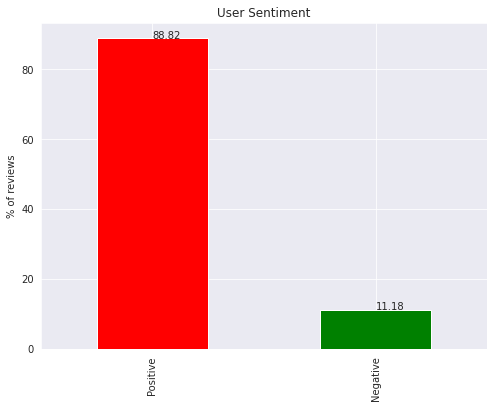

In [39]:
print(df['user_sentiment'].value_counts())
print("********************")
colors = ['Red','Green']
plt.figure(figsize=(8,6))
b_plt=(round(df['user_sentiment'].value_counts(normalize=True)*100,2).plot.bar(color=colors))
autolabel_v(b_plt)
plt.title('User Sentiment')
plt.ylabel('% of reviews')
plt.show()


**Observation:** There are class imbalance. It can be observed from Negative Reviews of just 11.18%. 

##### reviews_rating:

Count Distribution of review ratings
5    20552
4     5932
1     1357
3     1309
2      401
Name: reviews_rating, dtype: int64
************************


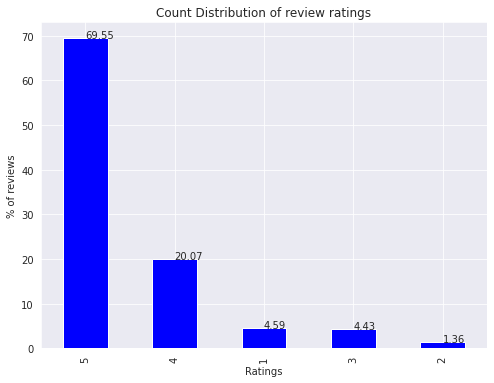

In [40]:
print('Count Distribution of review ratings')
print(df['reviews_rating'].value_counts())
print('************************')
colors = ['blue']
plt.figure(figsize=(8,6))
b_plt=(round(df['reviews_rating'].value_counts(normalize=True)*100,2).plot.bar(color=colors))
autolabel_v(b_plt)
plt.title('Count Distribution of review ratings')
plt.ylabel('% of reviews')
plt.xlabel('Ratings')

plt.show()

**Observation** The ratings are skewed towards Positive class. Percentage of reviews for Rating 5 higher than Rating 1.

#### Bivariate Analysis:

##### user_sentiment vs reviews_rating:

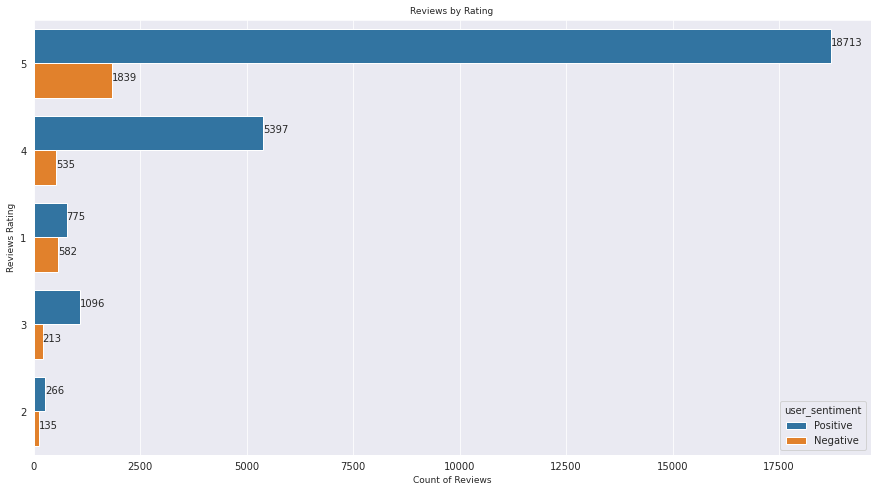

In [41]:
plt.figure(figsize=(15,8))
c_plt=sns.countplot(y='reviews_rating',hue='user_sentiment',data=df,order=df['reviews_rating'].value_counts().index)
autolabel_h(c_plt)
plt.title('Reviews by Rating',fontsize=9)
plt.xlabel('Count of Reviews',fontsize=9)
plt.ylabel('Reviews Rating',fontsize=9)
plt.show()

**Observation:** 

As it can be seen, there are significant number of reviews with rating 5 but they are classified as negative. It is possible that they have been missclassified. Same is for other ratings like 1, 4 also

In [42]:
rated5_neg =df[(df['reviews_rating'] == 5) & (df['user_sentiment'] == 'Negative')]
rated5_neg[['id','reviews_text','user_sentiment']].head(3)

,id,reviews_text,user_sentiment
211,AV1l8zRZvKc47QAVhnAv,this product makes my face feel like I have de...,Negative
213,AV1l8zRZvKc47QAVhnAv,After using a short time it totally changed th...,Negative
215,AV1l8zRZvKc47QAVhnAv,I like the feel and texture of my skin after u...,Negative


In [43]:
rated1_pos =df[(df['reviews_rating'] == 1) & (df['user_sentiment'] == 'Positive')]
rated1_pos[['id','reviews_text','user_sentiment']].head(3)

,id,reviews_text,user_sentiment
9,AV16khLE-jtxr-f38VFn,Got as a surprise for my husband there is noth...,Positive
11,AV16khLE-jtxr-f38VFn,Purchased this thinking it would have some sor...,Positive
14,AV16khLE-jtxr-f38VFn,First time purchase of this type of product. M...,Positive


**Observation:** 


We can see misclassification for Positive and Negative Sentiment tags when the actual content in both **reviews_text** and **reviews_title** suggest otherwise.

##### user_sentiment vs year:

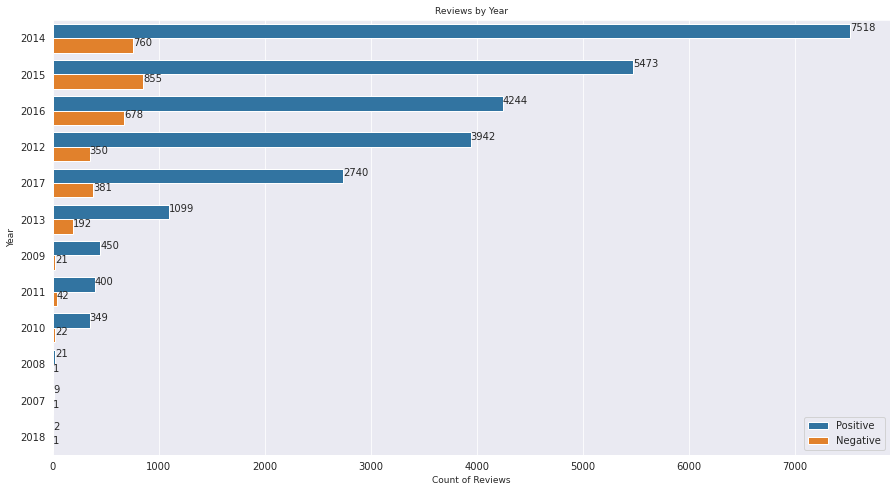

In [44]:
plt.figure(figsize=(15,8))
c_plt=sns.countplot(y='year',hue='user_sentiment',data=df,order=df['year'].value_counts().index)
autolabel_h(c_plt)
plt.title('Reviews by Year',fontsize=9)
plt.xlabel('Count of Reviews',fontsize=9)
plt.ylabel('Year',fontsize=9)
plt.legend(loc='lower right')
plt.show()

**Observation** The Dataset has most of the reviews from Year 2014 followed by 2015 and 2016. We can see skewness towards positive reviews on the Overall dataset, to be repeating within each Year. 

##### user_sentiment vs month:

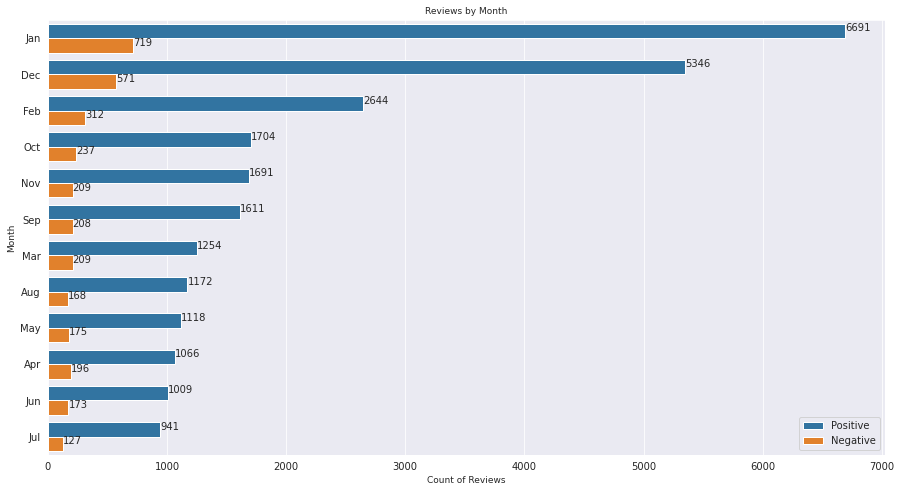

In [45]:
plt.figure(figsize=(15,8))
c_plt=sns.countplot(y='month',hue='user_sentiment',data=df,order=df['month'].value_counts().index)
autolabel_h(c_plt)
plt.title('Reviews by Month',fontsize=9)
plt.xlabel('Count of Reviews',fontsize=9)
plt.ylabel('Month',fontsize=9)
plt.legend(loc='lower right')
plt.show()

**Observation** The dataset has most of the reviews in Jan and Dec. The skewed distribution still exists for Positive and Negative user sentiments.

##### user_sentiment vs brand:

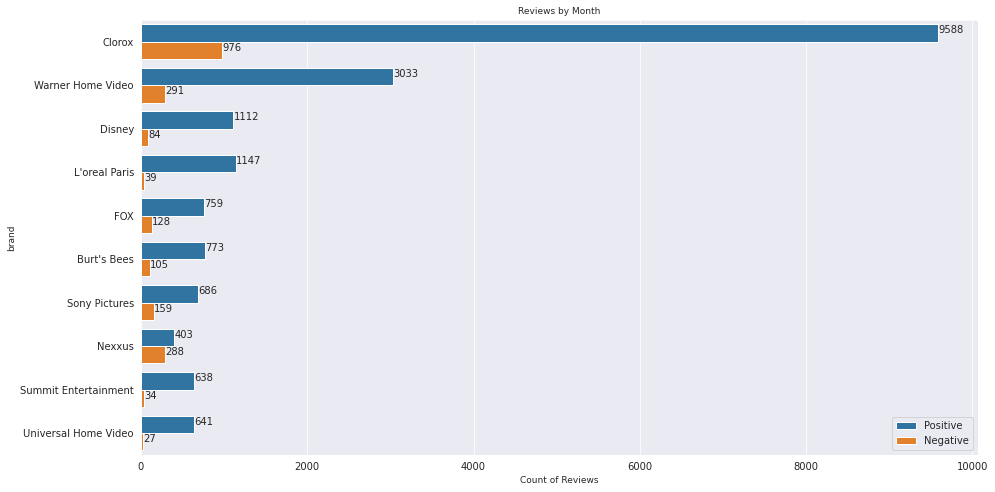

In [46]:
plt.figure(figsize=(15,8))
c_plt=sns.countplot(y='brand',hue='user_sentiment',data=df,order=df['brand'].value_counts().index[:10])
autolabel_h(c_plt)
plt.title('Reviews by Month',fontsize=9)
plt.xlabel('Count of Reviews',fontsize=9)
plt.ylabel('brand',fontsize=9)
plt.legend(loc='lower right')
plt.show()

**Observation** The dataset has most of the reviews for Clorex, Disney and Warner Home Video. The skewness for Positive and Negative sentiment is visible within brands also

##### user_sentiment vs name:

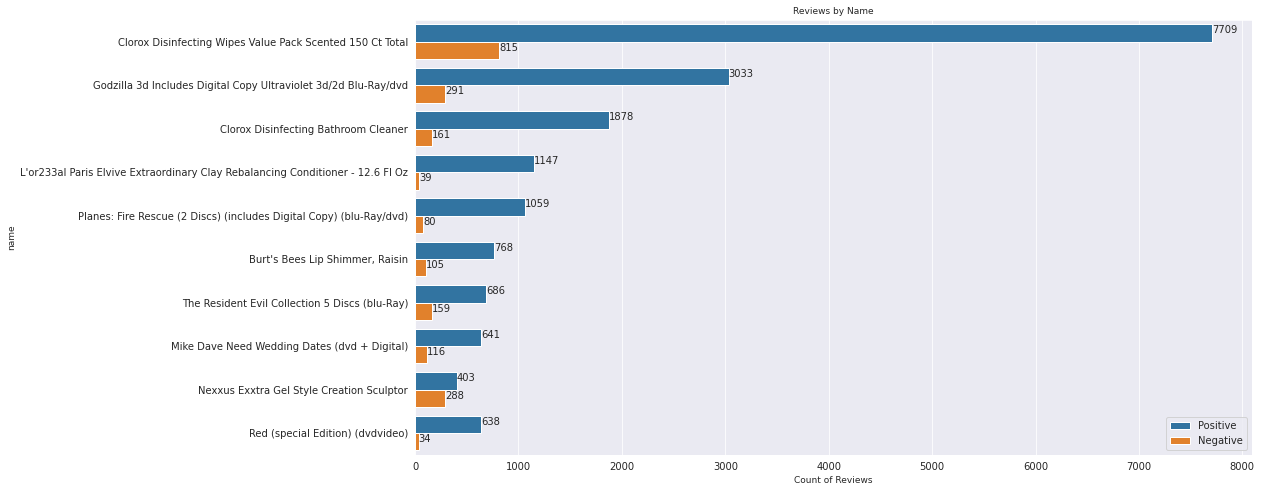

In [47]:
plt.figure(figsize=(15,8))
c_plt=sns.countplot(y='name',hue='user_sentiment',data=df,order=df['name'].value_counts().index[:10])
autolabel_h(c_plt)
plt.title('Reviews by Name',fontsize=9)
plt.xlabel('Count of Reviews',fontsize=9)
plt.ylabel('name',fontsize=9)
plt.legend(loc='lower right')
plt.show()

**Observation:** 

Clorex products are among the top products along with Movies from Disney and Warner Bros, personal care products from L'oreal feature in the top 10. The Skewed distribution for Positive and Negative is consistent within each product a well.

##### working on id and name columns

In [48]:
df[['id','name']].drop_duplicates().head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar


**Observation:** `id` Column has exact same distribution as that of the Product Name. This can be used a proxy to Product Name.

In [49]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment', 'month', 'year'], dtype='object')

##### Working of Categories

The categories column has multiple categories separated by comma. So, we'd take the first category as primary one and analyse the dataset

In [50]:
df['first_category'] = df['categories'].apply(lambda x: x.split(',')[0].strip())

##### user_sentiment vs first_category:

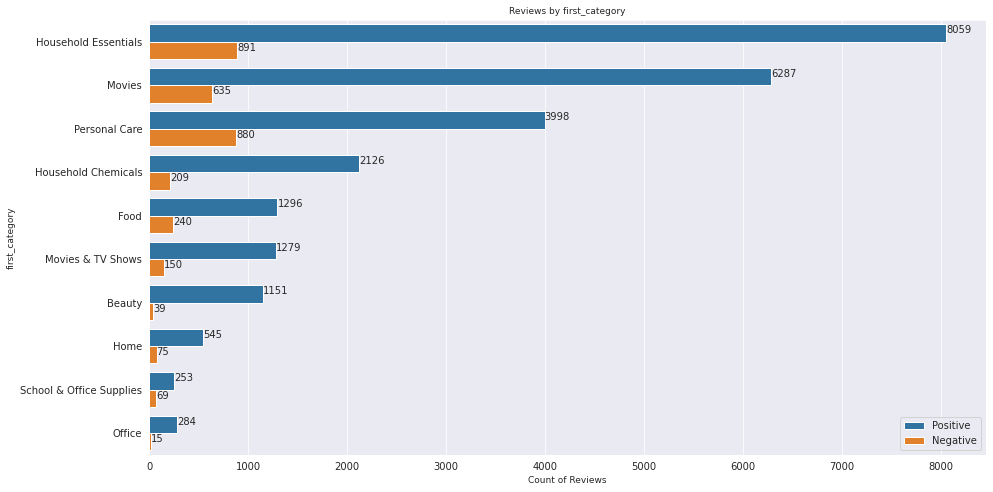

In [51]:
plt.figure(figsize=(15,8))
c_plt=sns.countplot(y='first_category',hue='user_sentiment',data=df,order=df['first_category'].value_counts().index[:10])
autolabel_h(c_plt)
plt.title('Reviews by first_category',fontsize=9)
plt.xlabel('Count of Reviews',fontsize=9)
plt.ylabel('first_category',fontsize=9)
plt.legend(loc='lower right')
plt.show()

**Observation:** 

The Dataset has most of the reviews for Household essentials, Movies and Personal Care Products. The Skewness for Positive and Negative sentiment is visible even within product categories.

##### user_sentiment vs manufacturer:

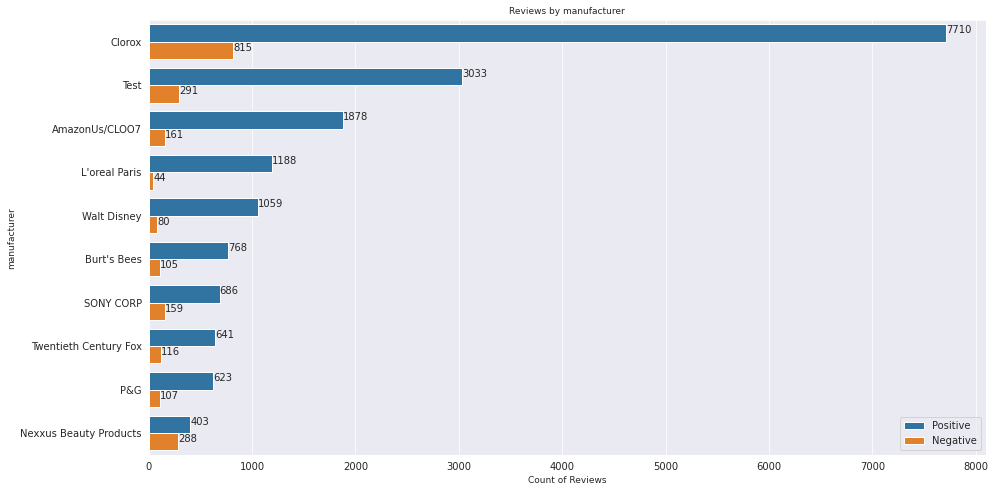

In [52]:
plt.figure(figsize=(15,8))
c_plt=sns.countplot(y='manufacturer',hue='user_sentiment',data=df,order=df['manufacturer'].value_counts().index[:10])
autolabel_h(c_plt)
plt.title('Reviews by manufacturer',fontsize=9)
plt.xlabel('Count of Reviews',fontsize=9)
plt.ylabel('manufacturer',fontsize=9)
plt.legend(loc='lower right')
plt.show()

**Observation:**  

Clorex products are among the top products along with Movies from Disney and Warner Bros, personal care products from L'oreal feature in the top 10. The Skewed distribution for Positive and Negative is consistent within each product a well.

##### user_sentiment vs reviews_text/length:

In [53]:
df['review_length'] = df['reviews_text'].apply(lambda x : len(x))

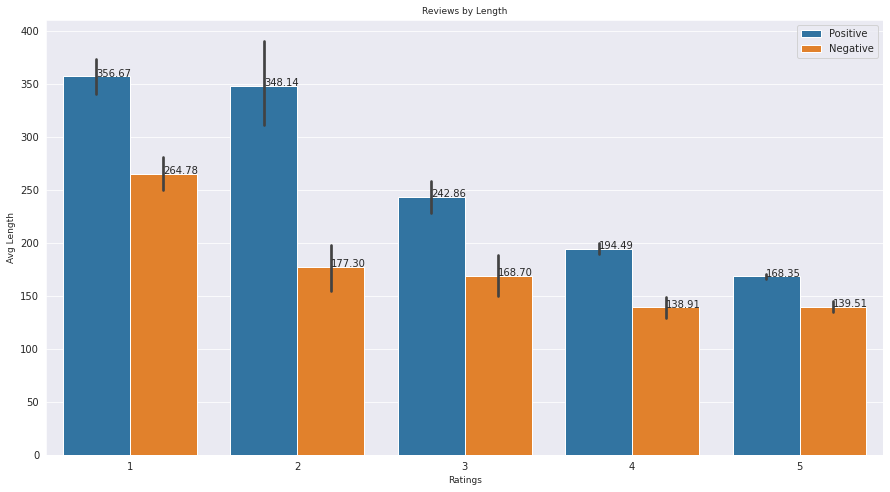

In [54]:
plt.figure(figsize=(15,8))
c_plt=sns.barplot(x='reviews_rating',y='review_length',hue='user_sentiment',data=df)
autolabel_v(c_plt)
plt.title('Reviews by Length',fontsize=9)
plt.xlabel('Ratings',fontsize=9)
plt.ylabel('Avg Length',fontsize=9)
plt.legend(loc='upper right')
plt.show()

**Observation** Review length indicates Good reviews (3,4,5 Ratings) are shorter compared to poor reviews (1,2 Ratings). 

The Positive & Negative proportion for Rating 5 seems small and possibly indicates an issue with the sentiment mapping. Same for 1,2 Rating Scales.

In [55]:
df_txt=df.copy()

In [61]:
df_txt.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,month,year,first_category,review_length
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,Nov,2012,Movies,201
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,Jul,2017,Food,62
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09,5,Good flavor.,Good,dorothy w,Positive,Jul,2017,Food,12
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,Jan,2016,Personal Care,696
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,Dec,2016,Personal Care,132


# Building Sentiment base classification model.


In [131]:
# for sentiment analysis we need only below mentioned columns 
cols = ['id', 'brand','name', 'reviews_rating', 'reviews_text', 'reviews_title','reviews_username', 'user_sentiment'] 
master_df = df[cols]
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29551 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29551 non-null  object
 1   brand             29551 non-null  object
 2   name              29551 non-null  object
 3   reviews_rating    29551 non-null  int64 
 4   reviews_text      29551 non-null  object
 5   reviews_title     29551 non-null  object
 6   reviews_username  29551 non-null  object
 7   user_sentiment    29551 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.0+ MB


It can be seen that there is no null values

In [132]:
master_df.head()

,id,brand,name,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative


In [133]:
ratings_text = {1:'One Star',2:'Two Star',3:'Three Star',4:'Four Star',5:'Five Star'}


In [134]:
master_df['reviews_rating_category'] = master_df['reviews_rating'].apply(lambda x: ratings_text.get(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
master_df.head()

,id,brand,name,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_rating_category
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,Five Star
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,Five Star
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Good,dorothy w,Positive,Five Star
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,One Star
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,One Star


In [136]:
#text and title are useful for anaysing sentiment so lets merge both columns into one
master_df['review_merged'] = master_df['reviews_title'] + ' ' + master_df['reviews_rating_category'] + ' ' + master_df['reviews_text']

master_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,brand,name,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_rating_category,review_merged
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,Five Star,Just Awesome Five Star i love this album. it's...
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,Five Star,Good Five Star Good flavor. This review was co...
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Good,dorothy w,Positive,Five Star,Good Five Star Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,One Star,Disappointed One Star I read through the revie...
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,One Star,Irritation One Star My husband bought this gel...


In [137]:
master_df = master_df.drop(['reviews_title','reviews_text','reviews_rating_category'],axis=1)
master_df.head()

,id,brand,name,reviews_rating,reviews_username,user_sentiment,review_merged
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,Just Awesome Five Star i love this album. it's...
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Five Star Good flavor. This review was co...
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Five Star Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,rebecca,Negative,Disappointed One Star I read through the revie...
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,walker557,Negative,Irritation One Star My husband bought this gel...


In [138]:
master_df['user_sentiment']=master_df['user_sentiment'].apply(lambda x: str(x).lower())

In [139]:
master_df.head()

,id,brand,name,reviews_rating,reviews_username,user_sentiment,review_merged
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,positive,Just Awesome Five Star i love this album. it's...
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,Good Five Star Good flavor. This review was co...
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,Good Five Star Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,rebecca,negative,Disappointed One Star I read through the revie...
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,walker557,negative,Irritation One Star My husband bought this gel...


In [140]:
def clean_text(sentence):
    #lower case
    unwanted_text = "this review was collected as part of a promotion."
    sentence = sentence.lower().replace(unwanted_text, "").strip()
    sentence=sentence.replace("n't", " not")

    sentence=sentence.lower()
    #remove punctuations
    #  [^\w\s]
    # ^ suggest compliment
    # \w matches any word character (equivalent to [a-zA-Z0-9_])
    # \s matches any whitespace character (equivalent to [\r\n\t\f\v ])
    sentence=re.sub(r"[^\w\s]","",sentence)

    #remove words having number
    #sentence=re.sub(r"\w*\d\w*","",sentence)

    return sentence




In [141]:
# convert the text to lower case
master_df['reviews_clean'] = master_df['review_merged'].swifter.apply(clean_text)
master_df.head()

Pandas Apply:   0%|          | 0/29551 [00:00<?, ?it/s]

,id,brand,name,reviews_rating,reviews_username,user_sentiment,review_merged,reviews_clean
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,positive,Just Awesome Five Star i love this album. it's...,just awesome five star i love this album its v...
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,Good Five Star Good flavor. This review was co...,good five star good flavor
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,Good Five Star Good flavor.,good five star good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,rebecca,negative,Disappointed One Star I read through the revie...,disappointed one star i read through the revie...
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,walker557,negative,Irritation One Star My husband bought this gel...,irritation one star my husband bought this gel...


In [142]:
negative_words = set(["no","nor","not"])
stop = set([word for word in stopwords.words("english") if word not in negative_words])

def lemmatize_text(sentence):
  lemmatized_sentence = []
  words=word_tokenize(sentence)
  
  #remove stopwords
  words=[word for word in words if word not in stop]
  sentence=" ".join(words)
  #sentence_sw=' '.join([word for word in sentence if word not in stopwords.words('english')])
  doc=nlp(sentence)
  for tok in doc:
    lemmatized_sentence.append(tok.lemma_)
  
  return " ".join(lemmatized_sentence)

In [143]:
def clean_text2(review):
  review = " ".join([word for word in nltk.tokenize.word_tokenize(review)])
  review = review.replace("-PRON-", "")
  return review

In [144]:
master_df['reviews_clean']=master_df['reviews_clean'].swifter.apply(lemmatize_text)

Pandas Apply:   0%|          | 0/29551 [00:00<?, ?it/s]

In [145]:
master_df["reviews_clean"] = master_df['reviews_clean'].apply(clean_text2)

In [146]:
master_df.head()

,id,brand,name,reviews_rating,reviews_username,user_sentiment,review_merged,reviews_clean
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,positive,Just Awesome Five Star i love this album. it's...,awesome five star love album good hip hop side...
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,Good Five Star Good flavor. This review was co...,good five star good flavor
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,Good Five Star Good flavor.,good five star good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,rebecca,negative,Disappointed One Star I read through the revie...,disappoint one star read review look buy one c...
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,walker557,negative,Irritation One Star My husband bought this gel...,irritation one star husband buy gel gel cause...


In [147]:
print(f"No of duplicate rows: {master_df.duplicated().sum()}")

No of duplicate rows: 264


In [148]:
master_df.drop_duplicates(inplace= True)

In [149]:
master_df.head()

,id,brand,name,reviews_rating,reviews_username,user_sentiment,review_merged,reviews_clean
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,positive,Just Awesome Five Star i love this album. it's...,awesome five star love album good hip hop side...
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,Good Five Star Good flavor. This review was co...,good five star good flavor
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,Good Five Star Good flavor.,good five star good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,rebecca,negative,Disappointed One Star I read through the revie...,disappoint one star read review look buy one c...
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,walker557,negative,Irritation One Star My husband bought this gel...,irritation one star husband buy gel gel cause...


In [150]:
master_df=master_df.reset_index()

In [151]:
master_df.drop(columns=['index'],inplace=True)

In [152]:
master_df.head()

,id,brand,name,reviews_rating,reviews_username,user_sentiment,review_merged,reviews_clean
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,positive,Just Awesome Five Star i love this album. it's...,awesome five star love album good hip hop side...
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,Good Five Star Good flavor. This review was co...,good five star good flavor
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,Good Five Star Good flavor.,good five star good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,rebecca,negative,Disappointed One Star I read through the revie...,disappoint one star read review look buy one c...
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,walker557,negative,Irritation One Star My husband bought this gel...,irritation one star husband buy gel gel cause...


In [153]:
master_df.drop(columns=['review_merged'],inplace=True)

In [154]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29287 entries, 0 to 29286
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29287 non-null  object
 1   brand             29287 non-null  object
 2   name              29287 non-null  object
 3   reviews_rating    29287 non-null  int64 
 4   reviews_username  29287 non-null  object
 5   user_sentiment    29287 non-null  object
 6   reviews_clean     29287 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.6+ MB


In [155]:
import pickle

In [156]:

def save_pickle(obj, name):
  with open(path+name + ".pkl", "wb") as f:
    pickle.dump(obj, f)

def load_pickle(name):
  with open(path+name, "rb") as f:
    return pickle.load(f)

In [157]:
save_pickle(master_df,"clean_df")

In [158]:
#check if data was saved correctly
clean_df=pd.read_pickle(path+'clean_df.pkl')

In [159]:
clean_df.head()

,id,brand,name,reviews_rating,reviews_username,user_sentiment,reviews_clean
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,positive,awesome five star love album good hip hop side...
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,good five star good flavor
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,good five star good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,rebecca,negative,disappoint one star read review look buy one c...
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,walker557,negative,irritation one star husband buy gel gel cause...


In [160]:
def get_text(sentiment):
  data = master_df[master_df['user_sentiment'] == sentiment]
  return ' '.join(data['reviews_clean'])

In [161]:
def generate_wordcloud(sentiment):
    text=get_text(sentiment)
    wordcloud = WordCloud(stopwords=stop,background_color='black',scale=3,max_font_size=40,
                          max_words=200,random_state=10).generate(text)
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()



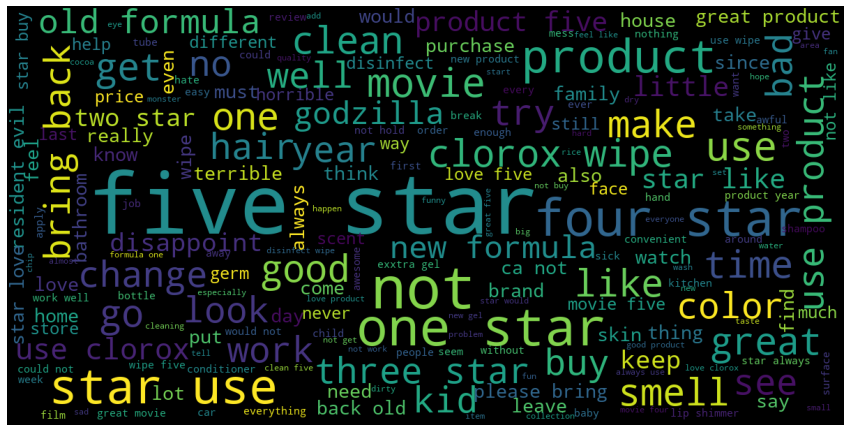

In [162]:
#negative
generate_wordcloud("negative")

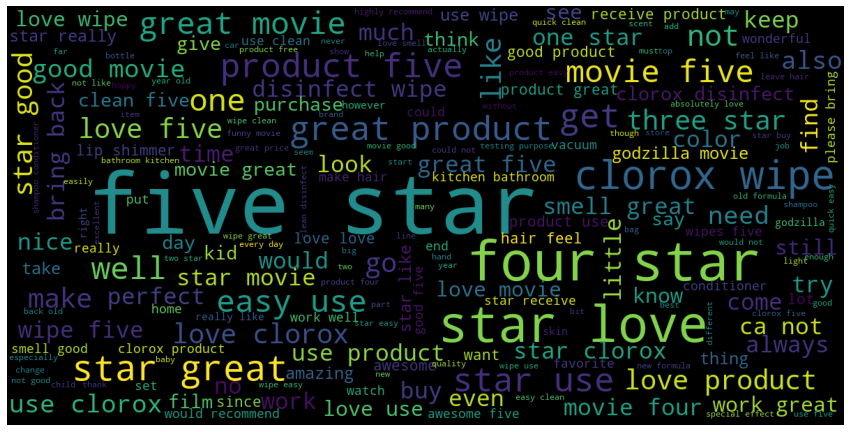

In [163]:
#positive
generate_wordcloud("positive")


#ML 

In [394]:
X=master_df['reviews_clean']
y=master_df['user_sentiment']

In [165]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [166]:
print(X_train.shape)
print(X_test.shape)

(23429,)
(5858,)


In [167]:
print("Before OverSampling, counts of label 'positive': {}".format(sum(y_train == 0)))
print("Before OverSampling, counts of label 'negative': {} \n".format(sum(y_train == 1)))

Before OverSampling, counts of label 'positive': 0
Before OverSampling, counts of label 'negative': 0 



In [168]:
#initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(max_df=0.5,ngram_range=(1,2),max_features=4000)
X_train_transformed = tfidf.fit_transform(X_train)
X_test_transformed = tfidf.transform(X_test)
#print(tfidf.vocabulary_.keys())

In [395]:
wordVectorizer = tfidf.fit_transform(X)

In [169]:
## Print the shape of each dataset.
print('X_train_transformed', X_train_transformed.shape)
print('y_train', y_train.shape)
print('X_test_transformed', X_test_transformed.shape)
print('y_test', y_test.shape)

X_train_transformed (23429, 4000)
y_train (23429,)
X_test_transformed (5858, 4000)
y_test (5858,)


In [396]:
save_pickle(wordVectorizer, "wordVectorizer")

### Handling class imbalance using SMOTE based techniques


In [171]:
counter = Counter(y_train)
print('Before',counter)
#Implement SMOTE for Class Imbalance
sm = SMOTE()
# transform the dataset
X_train_transformed_sm, y_train_sm = sm.fit_resample(X_train_transformed, y_train)
counter = Counter(y_train_sm)
print('After',counter)

Before Counter({'positive': 20839, 'negative': 2590})
After Counter({'negative': 20839, 'positive': 20839})


In [172]:
def evaluate_model(classifier):
  #cm = confusion_matrix(y_test, classifier.predict(X_test_transformed))
  #print("Confusion Matrix")
  #print(cm)
  print('Train Accuracy is ', accuracy_score(y_train, classifier.predict(X_train_transformed)))
  print('Test Accuracy is ', accuracy_score(y_test, classifier.predict(X_test_transformed)))
  print('Classification Report:',confusion_matrix(y_test, classifier.predict(X_test_transformed)))
  print(classification_report(y_test, classifier.predict(X_test_transformed)))
  print("ROC Curve:")
  plot_roc_curve(classifier, X_test_transformed, y_test)
  plt.show()




In [173]:
def evaluate_model_sm(classifier):
  #cm = confusion_matrix(y_test, classifier.predict(X_test_transformed))
  #print("Confusion Matrix")
  #print(cm)
  print('Train Accuracy is ', accuracy_score(y_train_sm, classifier.predict(X_train_transformed_sm)))
  print('Test Accuracy is ', accuracy_score(y_test, classifier.predict(X_test_transformed)))
  print('Classification Report:',confusion_matrix(y_test, classifier.predict(X_test_transformed)))
  print(classification_report(y_test, classifier.predict(X_test_transformed)))
  print("ROC Curve:")
  plot_roc_curve(classifier, X_test_transformed, y_test)
  plt.show()

#Model Building

###Logistic Regression

Train Accuracy is  0.9432314410480349
Test Accuracy is  0.8834073062478661
Classification Report: [[ 552  133]
 [ 550 4623]]
              precision    recall  f1-score   support

    negative       0.50      0.81      0.62       685
    positive       0.97      0.89      0.93      5173

    accuracy                           0.88      5858
   macro avg       0.74      0.85      0.77      5858
weighted avg       0.92      0.88      0.89      5858

ROC Curve:


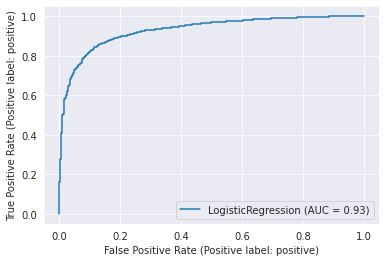

In [176]:
lr = LogisticRegression()
#Fit Model
lr.fit(X_train_transformed_sm,y_train_sm)

evaluate_model_sm(lr)

### Hyper parameter tuning

In [177]:
params_lr = {
    'C': [0.01,0.1,0.5,2,10,100],
    "penalty": ["l1", "l2"],
    'solver' : ['liblinear','lbfgs'],
    'max_iter' : [100, 500, 1000]
}

grid_lr = GridSearchCV(estimator=lr,param_grid=params_lr,cv = 5,verbose=1,scoring='f1_weighted',n_jobs=-1)
grid_lr.fit(X_train_transformed_sm,y_train_sm)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 2, 10, 100],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1_weighted', verbose=1)

In [178]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.9598117151849029


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train Accuracy is  0.9882192043764096
Test Accuracy is  0.894673950153636
Classification Report: [[ 449  236]
 [ 381 4792]]
              precision    recall  f1-score   support

    negative       0.54      0.66      0.59       685
    positive       0.95      0.93      0.94      5173

    accuracy                           0.89      5858
   macro avg       0.75      0.79      0.77      5858
weighted avg       0.90      0.89      0.90      5858

ROC Curve:


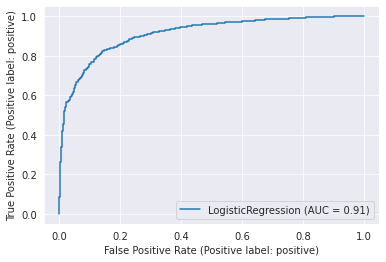

In [179]:
# With best parameters
lr_best = grid_lr.best_estimator_
lr_best.fit(X_train_transformed_sm,y_train_sm)
evaluate_model_sm(lr_best)

In [180]:
save_pickle(lr_best, "lr_best_model")

# Random Forest

Train Accuracy is  1.0
Test Accuracy is  0.903038579720041
Classification Report: [[ 342  343]
 [ 225 4948]]
              precision    recall  f1-score   support

    negative       0.60      0.50      0.55       685
    positive       0.94      0.96      0.95      5173

    accuracy                           0.90      5858
   macro avg       0.77      0.73      0.75      5858
weighted avg       0.90      0.90      0.90      5858

ROC Curve:


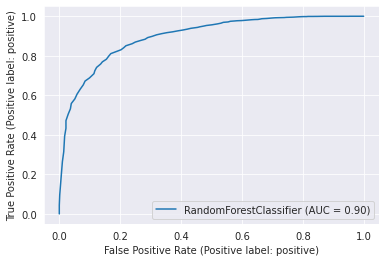

In [181]:
rf = RandomForestClassifier()
rf.fit(X_train_transformed_sm,y_train_sm)
evaluate_model_sm(rf)

In [182]:
# Hyperparameter tuning to improve Random Forest performance
params_rf = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [100, 300],
    
}

grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=params_rf,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring='f1_weighted')

grid_search_rf.fit(X_train_transformed_sm,y_train_sm)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [100, 300],
                         'n_estimators': [20, 50, 100, 200]},
             scoring='f1_weighted', verbose=1)

RandomForestClassifier(max_depth=30, min_samples_split=100, n_estimators=200)
Train Accuracy is  0.9418878065166275
Test Accuracy is  0.8668487538409013
Classification Report: [[ 427  258]
 [ 522 4651]]
              precision    recall  f1-score   support

    negative       0.45      0.62      0.52       685
    positive       0.95      0.90      0.92      5173

    accuracy                           0.87      5858
   macro avg       0.70      0.76      0.72      5858
weighted avg       0.89      0.87      0.88      5858

ROC Curve:


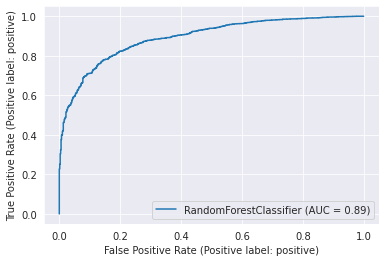

In [183]:
#best estimator

rf_best = grid_search_rf.best_estimator_
print(rf_best)

evaluate_model_sm(rf_best)

In [184]:
save_pickle(rf_best, "rf_best_model")

#XGBOOST

In [185]:
import xgboost as xgb
from xgboost import XGBClassifier

In [186]:
xgb_cl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cl.fit(X_train_transformed_sm, y_train_sm)

XGBClassifier(n_jobs=-1)

Train Accuracy is  0.8649167426460003
Test Accuracy is  0.8397063844315465
Classification Report: [[ 431  254]
 [ 685 4488]]
              precision    recall  f1-score   support

    negative       0.39      0.63      0.48       685
    positive       0.95      0.87      0.91      5173

    accuracy                           0.84      5858
   macro avg       0.67      0.75      0.69      5858
weighted avg       0.88      0.84      0.86      5858

ROC Curve:


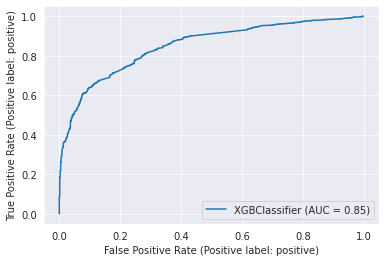

In [187]:
evaluate_model_sm(xgb_cl)

In [188]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.5, 0.8, 1.0],
        'colsample_bytree': [0.5, 0.8, 1.0],
        'max_depth': [3, 5, 10, 15]
        }

folds = 2


# Random search cross validation with 4 folds for Hyperparameter tuning:
random_search = RandomizedSearchCV(
        xgb_cl,
        param_distributions=params,
        scoring='f1_weighted',
        n_jobs=-1,
        cv=folds, verbose=1, random_state=42)

In [189]:
random_search.fit(X_train_transformed_sm,y_train_sm)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=XGBClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 5, 10, 15],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.5, 0.8, 1.0]},
                   random_state=42, scoring='f1_weighted', verbose=1)

In [190]:
# Getting the best estimator:
xgboost_best = random_search.best_estimator_
xgboost_best

XGBClassifier(colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=15,
              n_estimators=500, n_jobs=-1, subsample=0.5)

Train Accuracy is  0.9865876481597006
Test Accuracy is  0.9103789689313759
Classification Report: [[ 401  284]
 [ 241 4932]]
              precision    recall  f1-score   support

    negative       0.62      0.59      0.60       685
    positive       0.95      0.95      0.95      5173

    accuracy                           0.91      5858
   macro avg       0.79      0.77      0.78      5858
weighted avg       0.91      0.91      0.91      5858

ROC Curve:


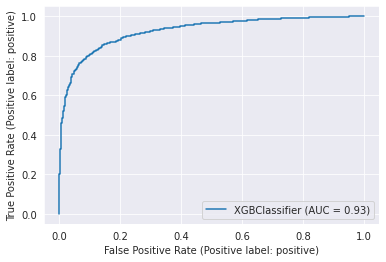

In [191]:
evaluate_model_sm(xgboost_best)

In [192]:
save_pickle(xgboost_best, "xgboost_best_model")

# NAIVE BAYES

In [193]:
# Fitting Naive Bayes Model
mnb=MultinomialNB()
mnb.fit(X_train_transformed_sm,y_train_sm)

MultinomialNB()

Train Accuracy is  0.8727626085704688
Test Accuracy is  0.8310003414134517
Classification Report: [[ 473  212]
 [ 778 4395]]
              precision    recall  f1-score   support

    negative       0.38      0.69      0.49       685
    positive       0.95      0.85      0.90      5173

    accuracy                           0.83      5858
   macro avg       0.67      0.77      0.69      5858
weighted avg       0.89      0.83      0.85      5858

ROC Curve:


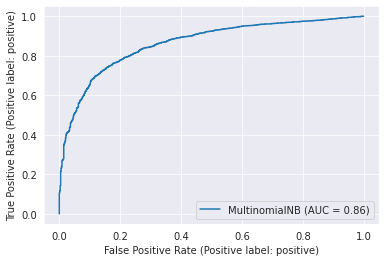

In [194]:
evaluate_model_sm(mnb)

In [195]:
# Hyperparameter tuning to improve performance
params_nb = {
    'alpha': [0.001, 0.005, 0.01, 0.1, 0.5, 1.0, 10.0]
    
}

grid_search_mnb = GridSearchCV(estimator=mnb,
                           param_grid=params_nb,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring='f1_weighted')

grid_search_mnb.fit(X_train_transformed_sm,y_train_sm)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='f1_weighted', verbose=1)

In [196]:
#best estimator
mnb_best = grid_search_mnb.best_estimator_
mnb_best.fit(X_train_transformed_sm,y_train_sm)
print(mnb_best)

MultinomialNB(alpha=0.001)


Train Accuracy is  0.8787400230483589
Test Accuracy is  0.8479003072721065
Classification Report: [[ 445  240]
 [ 651 4522]]
              precision    recall  f1-score   support

    negative       0.41      0.65      0.50       685
    positive       0.95      0.87      0.91      5173

    accuracy                           0.85      5858
   macro avg       0.68      0.76      0.71      5858
weighted avg       0.89      0.85      0.86      5858

ROC Curve:


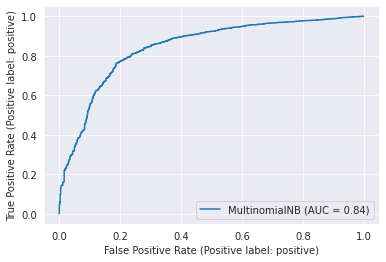

In [197]:
evaluate_model(mnb_best)

In [198]:
save_pickle(mnb_best, "mnb_best_model")

## Summary:

We'd use Logistic Regression Model as it has good AUC,f1 score

# Recommender System

In [290]:
master_df.head()

,id,brand,name,reviews_rating,reviews_username,user_sentiment,reviews_clean
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,positive,awesome five star love album good hip hop side...
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,good five star good flavor
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,good five star good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,rebecca,negative,disappoint one star read review look buy one c...
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,walker557,negative,irritation one star husband buy gel gel cause...


In [291]:
# No. of Unique Users in the Dataset
master_df.reviews_username.nunique()

24632

# User Based Collaborative Filtering

In [292]:
#train_test spli
train, test = train_test_split(master_df, test_size= 0.20, random_state=40)

In [293]:
print(train.shape)
print(test.shape)

(23429, 7)
(5858, 7)


In [294]:
# create pivot matrix table in which columns are products and rows are users
user_pivot = train.reset_index().pivot_table( index='reviews_username', columns='id',values='reviews_rating').fillna(0)
user_pivot.head(5)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5WElLJeJML43xv4b,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe625_ilAPnD_xQ4SP,AVpe6C3WLJeJML43yApY,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6_VI1cnluZ0-Z4do,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7JTHilAPnD_xQ_Cl,AVpe7jB8LJeJML43yj91,AVpe7sl91cnluZ0-aI1Y,AVpe7tA31cnluZ0-aI-r,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe9vHs1cnluZ0-a4TU,AVpe_5U_ilAPnD_xSrxG,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7HOwilAPnD_xkl3L,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7aUAilAPnD_xkqbP,AVpf7fFbilAPnD_xkrmW,AVpf8AoBilAPnD_xkzJ2,AVpf99c6LJeJML43Gu3K,AVpf9UGp1cnluZ0-uITX,AVpf9_3MLJeJML43GvdB,AVpf9pzn1cnluZ0-uNTM,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfC3KoLJeJML431KRR,AVpfCi3kilAPnD_xTn3k,AVpfCjEEilAPnD_xTn75,AVpfCuzrilAPnD_xTroT,AVpfCvKt1cnluZ0-cpI2,AVpfCy9b1cnluZ0-cqWS,AVpfD9xTLJeJML431ig2,AVpfDA6wilAPnD_xTxdg,AVpfDI3xilAPnD_xTz-k,AVpfD_NRilAPnD_xUG56,AVpfDiTDLJeJML431Y21,AVpfE5UF1cnluZ0-dY1N,AVpfE7puilAPnD_xUcCW,AVpfELcXLJeJML431naf,AVpfEqFbilAPnD_xUV28,AVpfEqruilAPnD_xUWDr,AVpfF7k8ilAPnD_xUyWf,AVpfFTpK1cnluZ0-diMS,AVpfFs_1ilAPnD_xUtRm,AVpfFymYilAPnD_xUvMh,AVpfGTRQLJeJML432WYA,AVpfG_ujilAPnD_xVI8L,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHI2filAPnD_xVL7R,AVpfHZMxLJeJML432tfs,AVpfHf4wLJeJML432vqK,AVpfIGFeLJeJML4328YR,AVpfIOoV1cnluZ0-ehGp,AVpfIvbgLJeJML433Kph,AVpfJCq51cnluZ0-ey-L,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNc9cLJeJML434tza,AVpfNfEMLJeJML434uf-,AVpfNglu1cnluZ0-gQ7x,AVpfO5u71cnluZ0-guiN,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfRxSkilAPnD_xYrzm,AVpfSFDo1cnluZ0-hwjT,AVpfSvmGilAPnD_xY_gE,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbjraLJeJML439F91,AVpfbkyr1cnluZ0-kozI,AVpfbpz

In [295]:
# creating dummy train and test 
dummy_train = train.copy()
dummy_train.head()

,id,brand,name,reviews_rating,reviews_username,user_sentiment,reviews_clean
12493,AVpf3VOfilAPnD_xjpun,Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,5,accwiz,positive,clorox wipes five star use every day quick eas...
18191,AVpfIvbgLJeJML433Kph,Ogx,"Ogx Conditioner, Hydrating Teatree Mint",5,noreen,positive,great companion shampoo five star love able co...
9619,AVpf3VOfilAPnD_xjpun,Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,5,maricc3,positive,clorox five star love use clorox product clean...
27234,AVpfRTh1ilAPnD_xYic2,Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,5,joanw,positive,plane fire rescue five star good action intere...
19720,AVpfJP1C1cnluZ0-e3Xy,Clorox,Clorox Disinfecting Bathroom Cleaner,5,karenjd,positive,product convenient five star drawer next toile...


In [296]:
# The Products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x >= 1 else 1)

In [297]:
# Convert the dummy train dataset into matrix format.columns are products and rows are users
# Convert the dummy train dataset into matrix format.
user_dummy_train = dummy_train.pivot_table(index='reviews_username',columns='id',values='reviews_rating').fillna(1)

In [298]:
user_dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5WElLJeJML43xv4b,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe625_ilAPnD_xQ4SP,AVpe6C3WLJeJML43yApY,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6_VI1cnluZ0-Z4do,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7JTHilAPnD_xQ_Cl,AVpe7jB8LJeJML43yj91,AVpe7sl91cnluZ0-aI1Y,AVpe7tA31cnluZ0-aI-r,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe9vHs1cnluZ0-a4TU,AVpe_5U_ilAPnD_xSrxG,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7HOwilAPnD_xkl3L,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7aUAilAPnD_xkqbP,AVpf7fFbilAPnD_xkrmW,AVpf8AoBilAPnD_xkzJ2,AVpf99c6LJeJML43Gu3K,AVpf9UGp1cnluZ0-uITX,AVpf9_3MLJeJML43GvdB,AVpf9pzn1cnluZ0-uNTM,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfC3KoLJeJML431KRR,AVpfCi3kilAPnD_xTn3k,AVpfCjEEilAPnD_xTn75,AVpfCuzrilAPnD_xTroT,AVpfCvKt1cnluZ0-cpI2,AVpfCy9b1cnluZ0-cqWS,AVpfD9xTLJeJML431ig2,AVpfDA6wilAPnD_xTxdg,AVpfDI3xilAPnD_xTz-k,AVpfD_NRilAPnD_xUG56,AVpfDiTDLJeJML431Y21,AVpfE5UF1cnluZ0-dY1N,AVpfE7puilAPnD_xUcCW,AVpfELcXLJeJML431naf,AVpfEqFbilAPnD_xUV28,AVpfEqruilAPnD_xUWDr,AVpfF7k8ilAPnD_xUyWf,AVpfFTpK1cnluZ0-diMS,AVpfFs_1ilAPnD_xUtRm,AVpfFymYilAPnD_xUvMh,AVpfGTRQLJeJML432WYA,AVpfG_ujilAPnD_xVI8L,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHI2filAPnD_xVL7R,AVpfHZMxLJeJML432tfs,AVpfHf4wLJeJML432vqK,AVpfIGFeLJeJML4328YR,AVpfIOoV1cnluZ0-ehGp,AVpfIvbgLJeJML433Kph,AVpfJCq51cnluZ0-ey-L,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNc9cLJeJML434tza,AVpfNfEMLJeJML434uf-,AVpfNglu1cnluZ0-gQ7x,AVpfO5u71cnluZ0-guiN,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfRxSkilAPnD_xYrzm,AVpfSFDo1cnluZ0-hwjT,AVpfSvmGilAPnD_xY_gE,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbjraLJeJML439F91,AVpfbkyr1cnluZ0-kozI,AVpfbpz

**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. 
To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different products. (i.e) We normalize ratings of the user around a mean of 0

#### Using Cosine Similarity

In [299]:
user_pivot.index.nunique()

20306

In [300]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(user_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.9486833 0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.        0.9486833 0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [301]:
user_correlation.shape

(20306, 20306)

#### Using Adjusted Cosine

In [302]:
# Here, we are not removing the NaN values and calculating the mean only for the products rated by the user
# Create a user-product matrix.
# Pivot dataset into matrix format in which columns are products and the rows are user IDs.
user_adjcosine_pivot = pd.pivot_table(train,index='reviews_username',columns='id',values='reviews_rating')

##### Finding Cosine Similarity



In [303]:
# Normalising the review rating of the product for each user around 0 mean

mean = np.nanmean(user_adjcosine_pivot, axis=1)
user_pivot_nrm  = (user_adjcosine_pivot.T - mean).T
user_pivot_nrm.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5WElLJeJML43xv4b,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe625_ilAPnD_xQ4SP,AVpe6C3WLJeJML43yApY,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6_VI1cnluZ0-Z4do,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7JTHilAPnD_xQ_Cl,AVpe7jB8LJeJML43yj91,AVpe7sl91cnluZ0-aI1Y,AVpe7tA31cnluZ0-aI-r,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe9vHs1cnluZ0-a4TU,AVpe_5U_ilAPnD_xSrxG,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7HOwilAPnD_xkl3L,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7aUAilAPnD_xkqbP,AVpf7fFbilAPnD_xkrmW,AVpf8AoBilAPnD_xkzJ2,AVpf99c6LJeJML43Gu3K,AVpf9UGp1cnluZ0-uITX,AVpf9_3MLJeJML43GvdB,AVpf9pzn1cnluZ0-uNTM,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfC3KoLJeJML431KRR,AVpfCi3kilAPnD_xTn3k,AVpfCjEEilAPnD_xTn75,AVpfCuzrilAPnD_xTroT,AVpfCvKt1cnluZ0-cpI2,AVpfCy9b1cnluZ0-cqWS,AVpfD9xTLJeJML431ig2,AVpfDA6wilAPnD_xTxdg,AVpfDI3xilAPnD_xTz-k,AVpfD_NRilAPnD_xUG56,AVpfDiTDLJeJML431Y21,AVpfE5UF1cnluZ0-dY1N,AVpfE7puilAPnD_xUcCW,AVpfELcXLJeJML431naf,AVpfEqFbilAPnD_xUV28,AVpfEqruilAPnD_xUWDr,AVpfF7k8ilAPnD_xUyWf,AVpfFTpK1cnluZ0-diMS,AVpfFs_1ilAPnD_xUtRm,AVpfFymYilAPnD_xUvMh,AVpfGTRQLJeJML432WYA,AVpfG_ujilAPnD_xVI8L,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHI2filAPnD_xVL7R,AVpfHZMxLJeJML432tfs,AVpfHf4wLJeJML432vqK,AVpfIGFeLJeJML4328YR,AVpfIOoV1cnluZ0-ehGp,AVpfIvbgLJeJML433Kph,AVpfJCq51cnluZ0-ey-L,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNc9cLJeJML434tza,AVpfNfEMLJeJML434uf-,AVpfNglu1cnluZ0-gQ7x,AVpfO5u71cnluZ0-guiN,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfRxSkilAPnD_xYrzm,AVpfSFDo1cnluZ0-hwjT,AVpfSvmGilAPnD_xY_gE,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbjraLJeJML439F91,AVpfbkyr1cnluZ0-kozI,AVpfbpz

###### Creating the User Similarity Matrix using pairwise_distance function.

In [304]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(user_pivot_nrm.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [305]:
user_correlation.shape

(20306, 20306)

# User - User prediction

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [306]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user is the weighted sum of correlation with the product rating

In [307]:
user_predicted_ratings = np.dot(user_correlation, user_adjcosine_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.5       , ..., 3.41937534, 0.        ,
        2.00160192],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [308]:
user_predicted_ratings.shape

(20306, 239)

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero. 

In [309]:
user_final_rating = np.multiply(user_predicted_ratings,user_dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5WElLJeJML43xv4b,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe625_ilAPnD_xQ4SP,AVpe6C3WLJeJML43yApY,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6_VI1cnluZ0-Z4do,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7JTHilAPnD_xQ_Cl,AVpe7jB8LJeJML43yj91,AVpe7sl91cnluZ0-aI1Y,AVpe7tA31cnluZ0-aI-r,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe9vHs1cnluZ0-a4TU,AVpe_5U_ilAPnD_xSrxG,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7HOwilAPnD_xkl3L,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7aUAilAPnD_xkqbP,AVpf7fFbilAPnD_xkrmW,AVpf8AoBilAPnD_xkzJ2,AVpf99c6LJeJML43Gu3K,AVpf9UGp1cnluZ0-uITX,AVpf9_3MLJeJML43GvdB,AVpf9pzn1cnluZ0-uNTM,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfC3KoLJeJML431KRR,AVpfCi3kilAPnD_xTn3k,AVpfCjEEilAPnD_xTn75,AVpfCuzrilAPnD_xTroT,AVpfCvKt1cnluZ0-cpI2,AVpfCy9b1cnluZ0-cqWS,AVpfD9xTLJeJML431ig2,AVpfDA6wilAPnD_xTxdg,AVpfDI3xilAPnD_xTz-k,AVpfD_NRilAPnD_xUG56,AVpfDiTDLJeJML431Y21,AVpfE5UF1cnluZ0-dY1N,AVpfE7puilAPnD_xUcCW,AVpfELcXLJeJML431naf,AVpfEqFbilAPnD_xUV28,AVpfEqruilAPnD_xUWDr,AVpfF7k8ilAPnD_xUyWf,AVpfFTpK1cnluZ0-diMS,AVpfFs_1ilAPnD_xUtRm,AVpfFymYilAPnD_xUvMh,AVpfGTRQLJeJML432WYA,AVpfG_ujilAPnD_xVI8L,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHI2filAPnD_xVL7R,AVpfHZMxLJeJML432tfs,AVpfHf4wLJeJML432vqK,AVpfIGFeLJeJML4328YR,AVpfIOoV1cnluZ0-ehGp,AVpfIvbgLJeJML433Kph,AVpfJCq51cnluZ0-ey-L,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNc9cLJeJML434tza,AVpfNfEMLJeJML434uf-,AVpfNglu1cnluZ0-gQ7x,AVpfO5u71cnluZ0-guiN,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfRxSkilAPnD_xYrzm,AVpfSFDo1cnluZ0-hwjT,AVpfSvmGilAPnD_xY_gE,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbjraLJeJML439F91,AVpfbkyr1cnluZ0-kozI,AVpfbpz

#### Finding the top 5 recommendation for the *user*

In [310]:
# Take the user ID as input.
user_input = input("Enter your user name: ")
print(user_input)

Enter your user name: 00sab00
00sab00


In [311]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpfPaoqLJeJML435Xk9    65.064814
AVpfRTh1ilAPnD_xYic2    45.829682
AVpf0eb2LJeJML43EVSt    19.633609
AVpf2tw1ilAPnD_xjflC    14.509964
AVpf3VOfilAPnD_xjpun    12.437987
Name: 00sab00, dtype: float64

Mapping Product Name

In [312]:
product_mapping = dict(master_df.groupby(['id','name'])['id','name'].nunique().index)
mapping_df = pd.DataFrame(columns=['id','name'])
mapping_df['id'] = product_mapping.keys()
mapping_df['name'] = product_mapping.values()

In [313]:
d = pd.merge(d,mapping_df,left_on='id',right_on='id', how = 'left')
d.head()

,id,00sab00,name
0,AVpfPaoqLJeJML435Xk9,65.064814,Godzilla 3d Includes Digital Copy Ultraviolet ...
1,AVpfRTh1ilAPnD_xYic2,45.829682,Planes: Fire Rescue (2 Discs) (includes Digita...
2,AVpf0eb2LJeJML43EVSt,19.633609,The Resident Evil Collection 5 Discs (blu-Ray)
3,AVpf2tw1ilAPnD_xjflC,14.509964,Red (special Edition) (dvdvideo)
4,AVpf3VOfilAPnD_xjpun,12.437987,Clorox Disinfecting Wipes Value Pack Scented 1...


### Evalutaion - User User

In [314]:
# Find out the common users of test and train dataset.
common_users = test[test['reviews_username'].isin(train['reviews_username'])]
common_users.shape

(1405, 7)

In [315]:
common_users.head()

,id,brand,name,reviews_rating,reviews_username,user_sentiment,reviews_clean
10263,AVpf3VOfilAPnD_xjpun,Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,5,irene50,positive,good five star product ever use have try many...
1823,AVpe41TqilAPnD_xQH3d,FOX,Mike Dave Need Wedding Dates (dvd + Digital),3,hollywood,positive,mediocre three star not funny expect wish woul...
7548,AVpf3VOfilAPnD_xjpun,Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,4,kristy9193,positive,awsome four star product great use clean stude...
10523,AVpf3VOfilAPnD_xjpun,Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,5,darcy,positive,awesome clean five star love clorox product kn...
14025,AVpf3VOfilAPnD_xjpun,Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,5,balvarado1970,positive,product great five star use product home clean...


In [316]:
#create pivot table
common_user_pivot = common_users.pivot_table(
    index='reviews_username', 
    columns='id', 
    values='reviews_rating')

In [317]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,20056,20057,20058,20059,20060,20061,20062,20063,20064,20065,20066,20067,20068,20069,20070,20071,20072,20073,20074,20075,20076,20077,20078,20079,20080,20081,20082,20083,20084,20085,20086,20087,20088,20089,20090,20091,20092,20093,20094,20095,20096,20097,20098,20099,20100,20101,20102,20103,20104,20105,20106,20107,20108,20109,20110,20111,20112,20113,20114,20115,20116,20117,20118,20119,20120,20121,20122,20123,20124,20125,20126,20127,20128,20129,20130,20131,20132,20133,20134,20135,20136,20137,20138,20139,20140,20141,20142,20143,20144,20145,20146,20147,20148,20149,20150,20151,20152,20153,20154,20155,20156,20157,20158,20159,20160,20161,20162,20163,20164,20165,20166,20167,20168,20169,20170,20171,20172,20173,20174,20175,20176,20177,20178,20179,20180,20181,20182,20183,20184,20185,20186,20187,20188,20189,20190,20191,20192,20193,20194,20195,20196,20197,20198,20199,20200,20201,20202,20203,20204,20205,20206,20207,20208,20209,20210,20211,20212,20213,20214,20215,20216,20217,20218,20219,20220,20221,20222,20223,20224,20225,20226,20227,20228,20229,20230,20231,20232,20233,20234,20235,20236,20237,20238,20239,20240,20241,20242,20243,20244,20245,20246,20247,20248,20249,20250,20251,20252,20253,20254,20255,20256,20257,20258,20259,20260,20261,20262,20263,20264,20265,20266,20267,20268,20269,20270,20271,20272,20273,20274,20275,20276,20277,20278,20279,20280,20281,20282,20283,20284,20285,20286,20287,20288,20289,20290,20291,20292,20293,20294,20295,20296,20297,20298,20299,20300,20301,20302,20303,20304,20305
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [319]:
# Re-index the correlation df to the same as the normalized user matrix built earlier
user_correlation_df['reviews_username'] = user_pivot_nrm.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,20056,20057,20058,20059,20060,20061,20062,20063,20064,20065,20066,20067,20068,20069,20070,20071,20072,20073,20074,20075,20076,20077,20078,20079,20080,20081,20082,20083,20084,20085,20086,20087,20088,20089,20090,20091,20092,20093,20094,20095,20096,20097,20098,20099,20100,20101,20102,20103,20104,20105,20106,20107,20108,20109,20110,20111,20112,20113,20114,20115,20116,20117,20118,20119,20120,20121,20122,20123,20124,20125,20126,20127,20128,20129,20130,20131,20132,20133,20134,20135,20136,20137,20138,20139,20140,20141,20142,20143,20144,20145,20146,20147,20148,20149,20150,20151,20152,20153,20154,20155,20156,20157,20158,20159,20160,20161,20162,20163,20164,20165,20166,20167,20168,20169,20170,20171,20172,20173,20174,20175,20176,20177,20178,20179,20180,20181,20182,20183,20184,20185,20186,20187,20188,20189,20190,20191,20192,20193,20194,20195,20196,20197,20198,20199,20200,20201,20202,20203,20204,20205,20206,20207,20208,20209,20210,20211,20212,20213,20214,20215,20216,20217,20218,20219,20220,20221,20222,20223,20224,20225,20226,20227,20228,20229,20230,20231,20232,20233,20234,20235,20236,20237,20238,20239,20240,20241,20242,20243,20244,20245,20246,20247,20248,20249,20250,20251,20252,20253,20254,20255,20256,20257,20258,20259,20260,20261,20262,20263,20264,20265,20266,20267,20268,20269,20270,20271,20272,20273,20274,20275,20276,20277,20278,20279,20280,20281,20282,20283,20284,20285,20286,20287,20288,20289,20290,20291,20292,20293,20294,20295,20296,20297,20298,20299,20300,20301,20302,20303,20304,20305
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [320]:
# Build a list with common user names only and take only users from correlation with common users
list_name = common_users.reviews_username.tolist()
user_correlation_df.columns = user_pivot_nrm.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [321]:
user_correlation_df_1.shape

(1232, 20306)

In [322]:
# Use intermediate dataframes to transpose and build the predicted rating matrix
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
user_correlation_df_3 = user_correlation_df_2.T
user_correlation_df_3[user_correlation_df_3<0]=0
# Dot product of predicted and original ratings to be used for RMSE computation
common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_pivot.fillna(0))
common_user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35593425, 0.        , ..., 0.        , 0.35593425,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [323]:
# Take test data and apply logic for already rated products
dummy_test = common_users.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [324]:
# Recompute predicted ratings for test data
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [325]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [326]:
common_ = common_users.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [327]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [328]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.573845639750662


#### Summary 
User based Recommendation gives an RMSE of 2.57

## Item Based Collaborative Filtering


In [329]:
# Pivot the train ratings' dataset into matrix format in which columns are users and the rows are product IDs.
item_pivot = pd.pivot_table(train,
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

Normalising  using the Adjusted Cosine

In [330]:
mean = np.nanmean(item_pivot, axis=1)
item_pivot_nrm = (item_pivot.T-mean).T

In [331]:
item_pivot_nrm.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,11677j,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,127726,12cass12,12gage,132457,13dani,13ld,13ram,1421nikki,143st,15425shopper,1616,170361eggs,1753,17roses,18612,1863philly,1943,1950rmm,1968bear,1970,1979edes,1992firebirdgirl,19bubba67,19granny,1awesome1,1buzymom,1cadet,1chynna,1clean1,1cleaner,1cocoafan,1derpet1,1disappoint,1glenn,1happymom,1izzy1,1jc1,1jodie,1kindword,1nikki31t,1officegal,1okc2thunder3up4,1olaygal,1shop,1sonny,1stcavdivision,1stgrade,1stlady,1sttimemama,1sungirl,1tomg,1vgarcia,1wildbill2l,1witch,2011mom2b,2011pink2011,2013bestbuyer,2014bestbuys,2015mom,2062351337,20crafter16,2175046722,232323,23jen,2455,24hrstoneroses,262jennifer,2827,28green,295259,2athome,2big,2busy4u,2dobies,2ds4es14,2esinapod,2forhokies,2iceskates,2low4zero,2rogersmakearight,2shoes,2sweetdaisies,2xmom,30103,3276teev,3375509742,37f5p,3babiesat41,3bear,3bees,3dcav,3dmoviewatcher,3dpenguin,3dpic,3kids,3lilones,3littleswimmers,3ringbandb,3ringcircus,3sawhorsesneeded,3scissors,3skyyblue,4 rooms 1 dog lotsa fur,4048197640,405april,4112,4141,45177ss,45cleanupwoman,45mindishqueen,4795181377,49erfaithful,49ersfor6,4bukfam,4cloroxl,4djs,4dogmom,4frugal,4gis1975,4katelyn,4littleones,4luds,4momma88,4my5goldens,4parman,4shop,4stew57,4th grade teacher,4theloveofclorox,4wipes,500mpl,50cal,5150seriousshopper5150,54867906,551580,5742870423,57susie,5alarm,5boysohmy,5kids,5mcdaniels,5star414,62deuce,63lamb,64falcon,6623443094,66babe,66cutie,6787249844,67firebird,69chopper,6cockers,6mex2,7,70chp,70cohoosier,714reginald,714rv,72443,74corvetteguy,7737593842,79captm79,7autumn5,7frances7,7of9,7rick,80021mom,80204,8023,808wrx,81t21,827,85721747267,8574178605,85lisa,8675309,88brit06,89c46698305f04e39d57a88a2c5c3ce297787288,8ellie24,8kucs,8mooshu,8rob1,9373weld,987654321abc,98nd500,99runner,9thdoctor,_christenak,a hutch,a leaf on the family tree,a11mxdup,a1cbee1481,a1s3,a786,a7xmaddlove,aaam,aabrannon,aac06002,aac3,aagbaghagmom,aakon,aalyah,aaron,aaronabigail,aaronlab,aaronm,aaube1990,aaulvu,aayla,ab1015,ab45,abananie,abartine,abashli,abaybay,abberdoodlesmom,abbey,abbi,abbs77,abbuyguy,abby,abby1,abby11,abby132,abc,abc1245,abc4sb206,...,xander,xander126,xavenger,xavier,xaviersmommy110311,xbflysky,xblazingsaddles,xbox,xboxlover,xcanuck,xcartersmommyx,xcelerate,xcoach98,xcrisstanicolex,xena,xenawp,xeon500cc,xfilipinox,xgivanx,xhillbill,xiaodan z,xiihong,xjryan,xlivayy,xman,xman5969,xmas,xmen1234,xmhana,xmom,xnerd86x,xolisa,xoxorosita,xpjunk,xplnusa,xqhinc,xracer,xray,xraymom,xsbluesugar,xsnitro,xstr8edgex,xtinaa01,xtony,xxacw12xx,xxcris,xxfloridagirlxx,xxxxxxxxxxxx,xxyy,xyoung,xyzmom,xzaclee16,y4all,yadleyburg420,yagerbomb07,yago,yaii,yalc,yama,yamel97,yana,yang,yangko,yankee23,yankeegirl15,yankeegirl7980,yankeemama73,yankees,yankees500,yanks,yanks2k14,yanna,yappingpuppy,yaquiv,yard12,yardleysmother,yarethv,yari1,yari34,yarihdz,yassi,yata32,yayatex,yayawomack,yaytay321,yazh,yazt,yazzmiin,ybadilla,ybeard,ycats123,ycyc,ydteoo,yeag350,yeapmsb,yeeya,yeknom,yelley,yellow,yellow09,yen0102,yes22,yes2carrotslover,yesman,yesseniaw22,yessi,yessi819,yessidoll23,yexzenica,yeya,yeyo,yg007,ygtz,yharkins,yj45,ymdunn,ymontes923,yneis,yoadrian,yoamomovies,yodas64,yogagirl,yogamom,yogip,yognap,yogore,yogurt,yohnie1,yojamey,yoko47,yolanda,yolandas,yoli36,yoliwill,yolo,yolonda24,yoly,yolyrn,yoma,yonino,yonoegwa,yoolie,yopack,yoperla,yorkielvr,yorkster88,yoshi,yosuerte,youjon,youknowit459,youlooksolovely,younggrannie62,yourbugginme04,yourmom,youronereviewer,youthfulone,yoyo1245,yrina03,yshan,yttric,yulkakapulka,yummy,yumyum,yunji,yvonne,yyz2112123,yzkgsx,z12345,z992,zabdelra,zach,zacharysaunt,zachizz,zachsmom,zacroxs,zak,zak08,zakkwylde29,zakkzakk,zamanda,zanarkandruinsx2,zanay,zanzan73,zapaduh,zapman,zara07,zarah,zaskar,zaza,zburt5,zchandyman,zebras,zebrastrong,zeek,zeeleader,zegan,zenanuts,zeramm,zero,zeroon

In [332]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(item_pivot_nrm.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [333]:
item_correlation.shape

(239, 239)

In [334]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Prediction - Item Item


In [335]:
item_predicted_ratings = np.dot((item_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00108722, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00118878, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00095103, 0.        ,
        0.        ]])

In [336]:
item_predicted_ratings.shape

(20306, 239)

In [337]:
dummy_train.shape

(23429, 7)

#### Filtering the rating only for the products not rated by the user for recommendation

In [338]:
item_final_rating = np.multiply(item_predicted_ratings,user_dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5WElLJeJML43xv4b,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe625_ilAPnD_xQ4SP,AVpe6C3WLJeJML43yApY,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6_VI1cnluZ0-Z4do,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7JTHilAPnD_xQ_Cl,AVpe7jB8LJeJML43yj91,AVpe7sl91cnluZ0-aI1Y,AVpe7tA31cnluZ0-aI-r,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe9vHs1cnluZ0-a4TU,AVpe_5U_ilAPnD_xSrxG,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7HOwilAPnD_xkl3L,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7aUAilAPnD_xkqbP,AVpf7fFbilAPnD_xkrmW,AVpf8AoBilAPnD_xkzJ2,AVpf99c6LJeJML43Gu3K,AVpf9UGp1cnluZ0-uITX,AVpf9_3MLJeJML43GvdB,AVpf9pzn1cnluZ0-uNTM,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfC3KoLJeJML431KRR,AVpfCi3kilAPnD_xTn3k,AVpfCjEEilAPnD_xTn75,AVpfCuzrilAPnD_xTroT,AVpfCvKt1cnluZ0-cpI2,AVpfCy9b1cnluZ0-cqWS,AVpfD9xTLJeJML431ig2,AVpfDA6wilAPnD_xTxdg,AVpfDI3xilAPnD_xTz-k,AVpfD_NRilAPnD_xUG56,AVpfDiTDLJeJML431Y21,AVpfE5UF1cnluZ0-dY1N,AVpfE7puilAPnD_xUcCW,AVpfELcXLJeJML431naf,AVpfEqFbilAPnD_xUV28,AVpfEqruilAPnD_xUWDr,AVpfF7k8ilAPnD_xUyWf,AVpfFTpK1cnluZ0-diMS,AVpfFs_1ilAPnD_xUtRm,AVpfFymYilAPnD_xUvMh,AVpfGTRQLJeJML432WYA,AVpfG_ujilAPnD_xVI8L,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHI2filAPnD_xVL7R,AVpfHZMxLJeJML432tfs,AVpfHf4wLJeJML432vqK,AVpfIGFeLJeJML4328YR,AVpfIOoV1cnluZ0-ehGp,AVpfIvbgLJeJML433Kph,AVpfJCq51cnluZ0-ey-L,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNc9cLJeJML434tza,AVpfNfEMLJeJML434uf-,AVpfNglu1cnluZ0-gQ7x,AVpfO5u71cnluZ0-guiN,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfRxSkilAPnD_xYrzm,AVpfSFDo1cnluZ0-hwjT,AVpfSvmGilAPnD_xY_gE,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbjraLJeJML439F91,AVpfbkyr1cnluZ0-kozI,AVpfbpz

In [339]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)

Enter your user name02deuce
02deuce


In [340]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpf5olc1cnluZ0-tPrO    0.153759
AVpfBU2S1cnluZ0-cJsO    0.050149
AVpfRTh1ilAPnD_xYic2    0.040828
AV1ZSp2uglJLPUi8IQFy    0.036706
AVpfkQkcLJeJML43_kEC    0.025955
Name: 02deuce, dtype: float64

In [341]:
d = pd.merge(d,mapping_df,left_on='id',right_on='id', how = 'left')
d.head()

,id,02deuce,name
0,AVpf5olc1cnluZ0-tPrO,0.153759,Chester's Cheese Flavored Puffcorn Snacks
1,AVpfBU2S1cnluZ0-cJsO,0.050149,Power Crunch Protein Energy Bar Peanut Butter ...
2,AVpfRTh1ilAPnD_xYic2,0.040828,Planes: Fire Rescue (2 Discs) (includes Digita...
3,AV1ZSp2uglJLPUi8IQFy,0.036706,"Cetaphil Gentle Skin Cleanser, 2oz"
4,AVpfkQkcLJeJML43_kEC,0.025955,Cococare 100% Natural Castor Oil


#### Evaluation - Item Item


In [342]:
# Get common items from train and test sets
common_items = test[test['id'].isin(train['id'])]
common_items.shape

(5847, 7)

In [343]:
common_item_based_matrix = common_items.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [344]:
common_item_based_matrix.shape

(163, 5547)

In [345]:
item_correlation_df = pd.DataFrame(item_correlation)

In [346]:
# Re-index the correlation data frame to the product ids
item_correlation_df['id'] = item_pivot_nrm.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018124,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [347]:
# Use intermediate df's to transpose and build the predicted rating matrix
list_name = common_items['id'].tolist()
item_correlation_df.columns = item_pivot_nrm.index.tolist()
item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]
item_correlation_df_3 = item_correlation_df_2.T

In [348]:
#Filter for Positive correlations
item_correlation_df_3[item_correlation_df_3<0]=0

In [349]:
#Dot product of predicted and original ratings to be used for RMSE computation
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0036981 , 0.0036981 , 0.        , ..., 0.        , 0.0036981 ,
        0.0036981 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00118878, 0.00118878, 0.        , ..., 0.        , 0.00118878,
        0.00118878]])

In [350]:
common_item_predicted_ratings.shape

(163, 5547)

In [351]:
# Take test data and apply logic for already rated products
dummy_test = common_items.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

In [352]:
# Recompute predicted ratings for test data
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [353]:
common_ = common_items.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [354]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [355]:
total_non_nan = np.count_nonzero(~np.isnan(y))

In [356]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5573245629436023


#### Section Summary 
User based Recommendation gives an RMSE of 3.55


**Observation** We see that User-based recommendation has a lesser RMSE (2.5) compared to Item based (3.6). 
So we will go ahead with user based recommendation

In [357]:
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5WElLJeJML43xv4b,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe625_ilAPnD_xQ4SP,AVpe6C3WLJeJML43yApY,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6_VI1cnluZ0-Z4do,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7JTHilAPnD_xQ_Cl,AVpe7jB8LJeJML43yj91,AVpe7sl91cnluZ0-aI1Y,AVpe7tA31cnluZ0-aI-r,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe9vHs1cnluZ0-a4TU,AVpe_5U_ilAPnD_xSrxG,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7HOwilAPnD_xkl3L,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7aUAilAPnD_xkqbP,AVpf7fFbilAPnD_xkrmW,AVpf8AoBilAPnD_xkzJ2,AVpf99c6LJeJML43Gu3K,AVpf9UGp1cnluZ0-uITX,AVpf9_3MLJeJML43GvdB,AVpf9pzn1cnluZ0-uNTM,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfC3KoLJeJML431KRR,AVpfCi3kilAPnD_xTn3k,AVpfCjEEilAPnD_xTn75,AVpfCuzrilAPnD_xTroT,AVpfCvKt1cnluZ0-cpI2,AVpfCy9b1cnluZ0-cqWS,AVpfD9xTLJeJML431ig2,AVpfDA6wilAPnD_xTxdg,AVpfDI3xilAPnD_xTz-k,AVpfD_NRilAPnD_xUG56,AVpfDiTDLJeJML431Y21,AVpfE5UF1cnluZ0-dY1N,AVpfE7puilAPnD_xUcCW,AVpfELcXLJeJML431naf,AVpfEqFbilAPnD_xUV28,AVpfEqruilAPnD_xUWDr,AVpfF7k8ilAPnD_xUyWf,AVpfFTpK1cnluZ0-diMS,AVpfFs_1ilAPnD_xUtRm,AVpfFymYilAPnD_xUvMh,AVpfGTRQLJeJML432WYA,AVpfG_ujilAPnD_xVI8L,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHI2filAPnD_xVL7R,AVpfHZMxLJeJML432tfs,AVpfHf4wLJeJML432vqK,AVpfIGFeLJeJML4328YR,AVpfIOoV1cnluZ0-ehGp,AVpfIvbgLJeJML433Kph,AVpfJCq51cnluZ0-ey-L,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNc9cLJeJML434tza,AVpfNfEMLJeJML434uf-,AVpfNglu1cnluZ0-gQ7x,AVpfO5u71cnluZ0-guiN,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfRxSkilAPnD_xYrzm,AVpfSFDo1cnluZ0-hwjT,AVpfSvmGilAPnD_xY_gE,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbjraLJeJML439F91,AVpfbkyr1cnluZ0-kozI,AVpfbpz

In [358]:
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5WElLJeJML43xv4b,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe625_ilAPnD_xQ4SP,AVpe6C3WLJeJML43yApY,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6_VI1cnluZ0-Z4do,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7JTHilAPnD_xQ_Cl,AVpe7jB8LJeJML43yj91,AVpe7sl91cnluZ0-aI1Y,AVpe7tA31cnluZ0-aI-r,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe9vHs1cnluZ0-a4TU,AVpe_5U_ilAPnD_xSrxG,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7HOwilAPnD_xkl3L,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7aUAilAPnD_xkqbP,AVpf7fFbilAPnD_xkrmW,AVpf8AoBilAPnD_xkzJ2,AVpf99c6LJeJML43Gu3K,AVpf9UGp1cnluZ0-uITX,AVpf9_3MLJeJML43GvdB,AVpf9pzn1cnluZ0-uNTM,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfC3KoLJeJML431KRR,AVpfCi3kilAPnD_xTn3k,AVpfCjEEilAPnD_xTn75,AVpfCuzrilAPnD_xTroT,AVpfCvKt1cnluZ0-cpI2,AVpfCy9b1cnluZ0-cqWS,AVpfD9xTLJeJML431ig2,AVpfDA6wilAPnD_xTxdg,AVpfDI3xilAPnD_xTz-k,AVpfD_NRilAPnD_xUG56,AVpfDiTDLJeJML431Y21,AVpfE5UF1cnluZ0-dY1N,AVpfE7puilAPnD_xUcCW,AVpfELcXLJeJML431naf,AVpfEqFbilAPnD_xUV28,AVpfEqruilAPnD_xUWDr,AVpfF7k8ilAPnD_xUyWf,AVpfFTpK1cnluZ0-diMS,AVpfFs_1ilAPnD_xUtRm,AVpfFymYilAPnD_xUvMh,AVpfGTRQLJeJML432WYA,AVpfG_ujilAPnD_xVI8L,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHI2filAPnD_xVL7R,AVpfHZMxLJeJML432tfs,AVpfHf4wLJeJML432vqK,AVpfIGFeLJeJML4328YR,AVpfIOoV1cnluZ0-ehGp,AVpfIvbgLJeJML433Kph,AVpfJCq51cnluZ0-ey-L,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNc9cLJeJML434tza,AVpfNfEMLJeJML434uf-,AVpfNglu1cnluZ0-gQ7x,AVpfO5u71cnluZ0-guiN,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfRxSkilAPnD_xYrzm,AVpfSFDo1cnluZ0-hwjT,AVpfSvmGilAPnD_xY_gE,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbjraLJeJML439F91,AVpfbkyr1cnluZ0-kozI,AVpfbpz

In [359]:
mapping_df.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
2,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
3,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...
4,AV1YIch7GV-KLJ3addeG,"Heinz Tomato Ketchup, 38oz"


In [360]:
save_pickle(item_final_rating, "recommendation_engine_ibcf")

In [361]:
save_pickle(user_final_rating, "recommendation_engine_ubcf")

In [362]:
save_pickle(mapping_df, "product_mapping")

# Improving the recommendations using the sentiment analysis model


In [363]:
with open(path+'recommendation_engine_ubcf.pkl', 'rb') as file:
    recomendation_matrix = pickle.load(file)

In [371]:
recomendation_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20306 entries, 00dog3 to zzz1127
Columns: 239 entries, AV13O1A8GV-KLJ3akUyj to AVpfv4TlilAPnD_xhjNS
dtypes: float64(239)
memory usage: 37.7+ MB


In [397]:
with open(path+'wordVectorizer.pkl', 'rb') as file:
    word_vectorizer = pickle.load(file)

In [398]:
word_vectorizer

<29287x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 615826 stored elements in Compressed Sparse Row format>

In [381]:
with open(path+'lr_best_model.pkl', 'rb') as file:
    model_lr = pickle.load(file)

In [382]:
model_lr

LogisticRegression(C=100)

In [389]:
with open(path+'xgboost_best_model.pkl', 'rb') as file:
    model_xg = pickle.load(file)

In [390]:
model_xg

XGBClassifier(colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=15,
              missing=nan, n_estimators=500, n_jobs=-1, subsample=0.5)

In [366]:
with open(path+'product_mapping.pkl', 'rb') as file:
    product_mapping = pickle.load(file)

In [372]:
product_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      249 non-null    object
 1   name    249 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [367]:
with open(path+'clean_df.pkl', 'rb') as file:
    clean_df = pickle.load(file)

In [368]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29287 entries, 0 to 29286
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29287 non-null  object
 1   brand             29287 non-null  object
 2   name              29287 non-null  object
 3   reviews_rating    29287 non-null  int64 
 4   reviews_username  29287 non-null  object
 5   user_sentiment    29287 non-null  object
 6   reviews_clean     29287 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.6+ MB


In [376]:
user_input = input("Enter your user name")

Enter your user name1234


In [439]:
recomended_20 = pd.DataFrame(recomendation_matrix.loc[user_input].sort_values(ascending=False)[0:20].index)


In [440]:
recomended_20

,id
0,AVpfRTh1ilAPnD_xYic2
1,AVpf0eb2LJeJML43EVSt
2,AVpe59io1cnluZ0-ZgDU
3,AVpf2tw1ilAPnD_xjflC
4,AVpfJP1C1cnluZ0-e3Xy
5,AVpfM_ytilAPnD_xXIJb
6,AVpf5olc1cnluZ0-tPrO
7,AVpf0thK1cnluZ0-r8vR
8,AVpe31o71cnluZ0-YrSD
9,AV1YGDqsGV-KLJ3adc-O


In [399]:
clean_df['PredictedSentiment'] = model_lr.predict(word_vectorizer)

In [421]:
clean_df

,id,brand,name,reviews_rating,reviews_username,user_sentiment,reviews_clean,PredictedSentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,positive,awesome five star love album good hip hop side...,negative
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,good five star good flavor,negative
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,good five star good flavor,negative
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,rebecca,negative,disappoint one star read review look buy one c...,negative
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,walker557,negative,irritation one star husband buy gel gel cause...,negative
...,...,...,...,...,...,...,...,...
29282,AVpfW8y_LJeJML437ySW,L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,5,laurasnchz,positive,softness five star get conditioner influenster...,positive
29283,AVpfW8y_LJeJML437ySW,L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,5,scarlepadilla,positive,love five star love receive review purpose inf...,positive
29284,AVpfW8y_LJeJML437ySW,L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,5,liviasuexo,positive,hair smooth use five star first love smell pro...,positive
29285,AVpfW8y_LJeJML437ySW,L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,5,ktreed95,positive,perfect oily hair five star receive influenste...,positive


# product sentiment prediction

In [405]:
#get total sentiment count for the product
clean_temp = clean_df.groupby(['id','PredictedSentiment'],as_index=False).agg(PredSentimentCnt = pd.NamedAgg(column = 'PredictedSentiment', aggfunc = 'count'))

In [407]:
clean_temp.head()

,id,PredictedSentiment,PredSentimentCnt
0,AV13O1A8GV-KLJ3akUyj,negative,1
1,AV14LG0R-jtxr-f38QfS,negative,2
2,AV16khLE-jtxr-f38VFn,negative,14
3,AV16khLE-jtxr-f38VFn,positive,13
4,AV1YGDqsGV-KLJ3adc-O,negative,139


In [408]:
#get total reviews
clean_temp['total_reviews']=clean_temp.groupby(['id'])['PredSentimentCnt'].transform(sum)

In [409]:
clean_temp.head()

,id,PredictedSentiment,PredSentimentCnt,total_reviews
0,AV13O1A8GV-KLJ3akUyj,negative,1,1
1,AV14LG0R-jtxr-f38QfS,negative,2,2
2,AV16khLE-jtxr-f38VFn,negative,14,27
3,AV16khLE-jtxr-f38VFn,positive,13,27
4,AV1YGDqsGV-KLJ3adc-O,negative,139,346


In [412]:
#get percentage of predicted sentiment for the product
clean_temp['percentage']=round((clean_temp['PredSentimentCnt'] / clean_temp['total_reviews'])*100,2)

In [417]:
clean_temp.head()

,id,PredictedSentiment,PredSentimentCnt,total_reviews,percentage
0,AV13O1A8GV-KLJ3akUyj,negative,1,1,100.00
1,AV14LG0R-jtxr-f38QfS,negative,2,2,100.00
2,AV16khLE-jtxr-f38VFn,negative,14,27,51.85
3,AV16khLE-jtxr-f38VFn,positive,13,27,48.15
4,AV1YGDqsGV-KLJ3adc-O,negative,139,346,40.17


In [423]:

clean_df[clean_df['id']=='AV16khLE-jtxr-f38VFn']['PredictedSentiment'].value_counts()

negative    14
positive    13
Name: PredictedSentiment, dtype: int64

In [424]:
clean_df_pos=clean_temp[clean_temp['PredictedSentiment']=='positive'][['id','percentage']]

In [426]:
clean_df_pos.columns = ['id','PositivePct']
clean_df_pos.head()

,id,PositivePct
3,AV16khLE-jtxr-f38VFn,48.15
5,AV1YGDqsGV-KLJ3adc-O,59.83
8,AV1YlENIglJLPUi8IHsX,70.59
10,AV1YmBrdGV-KLJ3adewb,77.78
12,AV1YmDL9vKc47QAVgr7_,84.27


In [427]:
print("Total No. of Products", clean_df['id'].nunique())
print("No. of Products with Positive %", len(clean_df_pos.index))

Total No. of Products 249
No. of Products with Positive % 226


In [428]:
clean_df_final=pd.merge(clean_df,clean_df_pos,on='id',how='left').fillna(0.0)
clean_df_final.head()

,id,brand,name,reviews_rating,reviews_username,user_sentiment,reviews_clean,PredictedSentiment,PositivePct
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,positive,awesome five star love album good hip hop side...,negative,0.00
1,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,good five star good flavor,negative,0.00
2,AV14LG0R-jtxr-f38QfS,Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,positive,good five star good flavor,negative,0.00
3,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,rebecca,negative,disappoint one star read review look buy one c...,negative,48.15
4,AV16khLE-jtxr-f38VFn,K-Y,K-Y Love Sensuality Pleasure Gel,1,walker557,negative,irritation one star husband buy gel gel cause...,negative,48.15


In [429]:
clean_df_final=clean_df_final[['id','name','PositivePct']].drop_duplicates()

In [430]:
clean_df_final.head()

,id,name,PositivePct
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),0.00
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,0.00
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,48.15
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream",83.33
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar,100.00


In [432]:
clean_df_final=clean_df_final.reset_index()
clean_df_final.drop(columns=['index'],inplace=True)

In [433]:
#df with id, name and predicted percentage of positive sentiment
clean_df_final.head()

,id,name,PositivePct
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),0.00
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,0.00
2,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,48.15
3,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream",83.33
4,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar,100.00


In [443]:
#save file
save_pickle(clean_df_final,"clean_df_final")

In [441]:
#get top 20 file for user
recomended_20=pd.merge(recomended_20,clean_df_final,on='id',how='inner').sort_values(['PositivePct'],ascending=False)[:20]

In [442]:
recomended_20

,id,name,PositivePct
19,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,92.75
15,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",85.80
14,AVpf4oLxLJeJML43FcxC,Avery174 Ready Index Contemporary Table Of Con...,79.53
3,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),73.36
12,AVpfPnrU1cnluZ0-g9rL,Stargate (ws) (ultimate Edition) (director's C...,72.58
10,AVpfD9xTLJeJML431ig2,There's Something About Mary (dvd),70.77
0,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,66.99
2,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,64.07
4,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,63.75
11,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Co...",62.66
